***Exponential loss vs misclasification loss***


In boosting, the classes are labeled (for convenience) as $+1$ and $-1$, respectively. Moreover, the classifier $\widehat{y}(x)$ is expressed on the form $\widehat{y}(x) = \operatorname{sign}\left(c(x)\right)$ (i.e., a thresholding at $0$ of some real-valued function $c(x)$). Assume that a function $\widehat{c}(x)$ is learned from training data such that we can make predictions $\widehat{y}(x) = \operatorname*{sign}\left(\widehat{c}(x)\right)$. For this case, the exponential and misclassification losses are studied in the following table.

| ${\widehat{c}{(x_\star)}}$ | $\widehat{y}_\star$ | Exponential loss <br>$\mathrm{exp}{\left(-y_\star\widehat{c}{(x_\star)}\right)}$ | Misclassification loss<br> $\mathbb{I}\left(y_\star\neq\widehat{y}_\star\right)$ | $y_\star$|
|:---:|:---:|:---:|:---:|:---:|
| 0.3  |   1   |  1.3499    |   1   |  -1  |
|-0.2  |   -1  |  0.8187    |   0   |  -1  |
| 1.5  |   1   |  0.2231    |   0   |   1  |
|-4.3  |   -1  |  73.700    |   1   |   1  |

The exponential loss is more informative than the misclassification loss, as it indicates the quality of a prediction depending on the margin of an outcome of the real-valued function $c(x)$ (i.e., how close or distant from the true label the prediction was). This information can be used when training a classifier to assign heavier weights to the data points with worse predictions, so that the model can better learn features to better predict them.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import ConfusionMatrixDisplay

Read dataset and get overall insight on the data

In [3]:
url = 'https://uu-sml.github.io/course-sml-public/data/email.csv'
email = pd.read_csv(url)
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

Create a training set containing a random sample of $75\%$ of the observations, and a test set containing the remaining observations.

In [5]:
trainIndex = np.random.choice(email.shape[0], size=int(0.75*len(email)), replace=False)
train_dataset = email.iloc[trainIndex]
test_dataset = email.iloc[~email.index.isin(trainIndex)]

Separate the datasets into features and labels (i.e., column `Class`)

In [6]:
train_x, train_y = train_dataset.drop(columns=['Class'], inplace=False), train_dataset['Class']
test_x, test_y = test_dataset.drop(columns=['Class'], inplace=False), test_dataset['Class']

Use the AdaBoost approach to learn a classifier `sklearn.ensemble.AdaBoostClassifier()` and compute the confusion matrix.

/usr/local/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


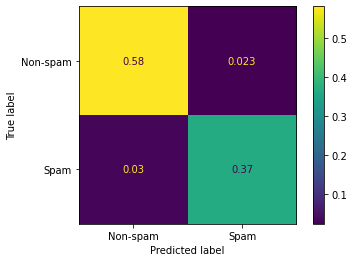

In [24]:
base_classifier = BaggingClassifier(n_estimators=10, max_samples=0.7)
adaboost_classifier = AdaBoostClassifier(base_estimator=base_classifier, n_estimators=50, learning_rate=1.0)
adaboost_classifier.fit(train_x, train_y)
predictions = adaboost_classifier.predict(test_x)
ConfusionMatrixDisplay.from_predictions(y_true = test_y, y_pred=predictions, normalize='all')

The script below illustrates the AdaBoost algorithm in the same way as was done in the lecture.

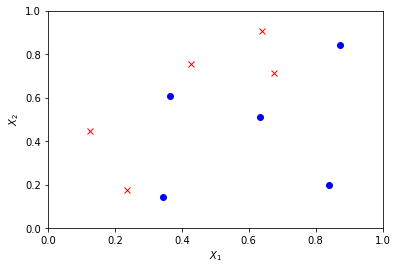

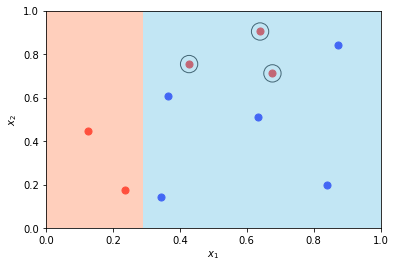

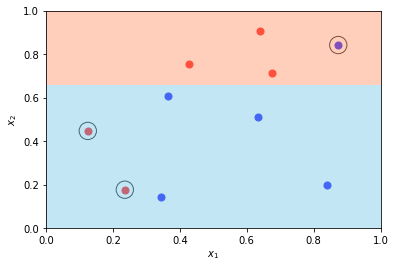

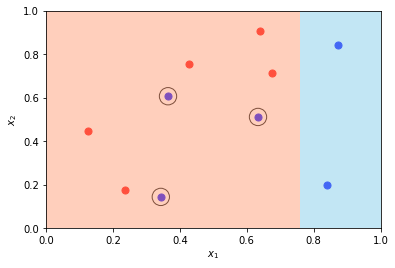

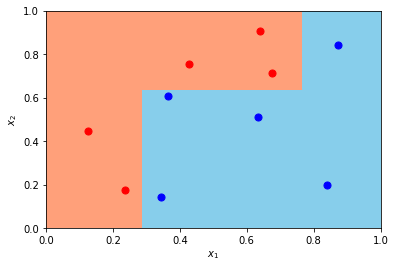

In [15]:
# Prepare the data
X1 = np.array([0.2358,0.1252,0.4278,0.6398,0.6767,0.8733,0.3648,0.6336,0.3433,0.8410])
X2 = np.array([0.1761,0.4465,0.7539,0.9037,0.7111,0.8414,0.6060,0.5107,0.1430,0.1994])
X = np.column_stack([X1,X2])
y = np.array([1,1,1,1,1,-1,-1,-1,-1,-1]) # the class labels are 1 and -1
n = len(y)

# Plot the data
fig, ax = plt.subplots()
ax.set_xlim((0, 1))
ax.set_ylim((0, 1))
ax.plot(X1[y==1], X2[y==1], 'x', color='red')
ax.plot(X1[y==-1], X2[y==-1], 'o', color='blue')
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')

# Define help variables
stumps = []
alpha = []
w = np.repeat(1/n, n) # boosting weights: start with equal weights
B = 3

# Learn the boosting classifier
for b in range(B):
    # Prepare plots
    fig, ax = plt.subplots()
    ax.set_xlim((0, 1))
    ax.set_ylim((0, 1))
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')

    # Use a decision stump (tree with depth 1) as base classifier
    model = tree.DecisionTreeClassifier(max_depth=1)
    model.fit(X, y, sample_weight=w)

    # Save the model in each step
    stumps.append(model)

    # Plot the decision boundary
    split_variable = model.tree_.feature[0]
    split_value = model.tree_.threshold[0]
    if split_variable == 0:
        x1 = [0, split_value, split_value, 0]
        x2 = [0, 0, 1, 1]
        ax.fill(x1, x2, 'lightsalmon', alpha=0.5)
        x1 = [split_value, 1, 1, split_value]
        ax.fill(x1, x2, 'skyblue', alpha=0.5)
    elif split_variable == 1:
        x1 = [0, 1, 1, 0]
        x2 = [split_value, split_value, 1, 1]
        ax.fill(x1, x2, 'lightsalmon', alpha=0.5)
        x2 = [0, 0, split_value, split_value]
        ax.fill(x1, x2, 'skyblue', alpha=0.5)
    
    # Plot the data
    ax.scatter(X1[y==1], X2[y==1], s=50, facecolors='red')
    ax.scatter(X1[y==-1], X2[y==-1], s=50, facecolors='blue')
    
    # Compute and plot the boosting weights for the next iteration
    correct = model.predict(X) == y
    ax.scatter(X1[~correct], X2[~correct], s=300, facecolors='none', edgecolors='k')

    W = np.sum(w) 
    We = np.sum(w[~correct]) # sum of incorrect weights

    em = We/W
    a = 1/2*np.log((1-em)/em) # compute the alpha weights
    alpha.append(a)

    w[correct] = w[correct] * np.exp(-a) # omega weights
    w[~correct] = w[~correct] * np.exp(a)

# Using the boosting model to predict test inputs
def boost_predict(X):
    pred = []
    for j in range(len(X)):
        predictions = np.empty(B)
        for i in range(B):
            predictions[i] = stumps[i].predict(X[j,:].reshape(1,-1))
        C = np.sum(np.array(alpha)[predictions==1]) - np.sum(np.array(alpha)[predictions==-1])
        pred.append(np.sign(C))
    return pred


# predict all pixels in the plot, i.e., plot the decision boundary
fig, ax = plt.subplots()
ax.set_xlim((0, 1))
ax.set_ylim((0, 1))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
xs1 = np.arange(0, 1.02, 0.03)
xs2 = np.arange(0, 1.02, 0.03)
x1, x2 = np.meshgrid(xs1, xs2) 
X_all = np.column_stack([x1.flatten(),x2.flatten()])
prediction = boost_predict(X_all)

colors = np.where(np.array(prediction)==1,'lightsalmon', 'skyblue')
ax.scatter(x1.flatten(), x2.flatten(), s = 90, marker='s', c=colors)
ax.scatter(X1[y==1], X2[y==1], s=50, facecolors='red')
ax.scatter(X1[y==-1], X2[y==-1], s=50, facecolors='blue')

plt.show()